In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

In [ ]:
train_image_files_path = "/content/drive/MyDrive/data/train"
valid_image_files_path = "/content/drive/MyDrive/data/validation"

In [ ]:
lable ='AJINOMOTO','AQUAFINA','BITIS','CLEAR','COCACOLA','COLGATE','DOVE','FANTA','KHONGCOSANPHAM','LIFEBUOY','MILO','NIKE','OMO','PEPSI','PS','SUNSILK'

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(128, 128),           
    class_mode='categorical',
    )      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(128, 128),           
    class_mode='categorical',
    )

Found 3197 images belonging to 16 classes.
Found 635 images belonging to 16 classes.


In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(16,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
EPOCHS=50
history=model.fit(
    train_generator,
    batch_size=32,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator
)

Epoch 1/50
100/100 [==============================] - 1904s 19s/step - loss: 2.7689 - acc: 0.0647 - val_loss: 2.7483 - val_acc: 0.1276
Epoch 2/50
100/100 [==============================] - 11s 111ms/step - loss: 2.7438 - acc: 0.1120 - val_loss: 2.7299 - val_acc: 0.1795
Epoch 3/50
100/100 [==============================] - 11s 110ms/step - loss: 2.7195 - acc: 0.1627 - val_loss: 2.7101 - val_acc: 0.1906
Epoch 4/50
100/100 [==============================] - 11s 110ms/step - loss: 2.6889 - acc: 0.1564 - val_loss: 2.6821 - val_acc: 0.2283
Epoch 5/50
100/100 [==============================] - 11s 110ms/step - loss: 2.6426 - acc: 0.2011 - val_loss: 2.6384 - val_acc: 0.2457
Epoch 6/50
100/100 [==============================] - 11s 110ms/step - loss: 2.5612 - acc: 0.2962 - val_loss: 2.5550 - val_acc: 0.2220
Epoch 7/50
100/100 [==============================] - 11s 110ms/step - loss: 2.3863 - acc: 0.4670 - val_loss: 2.3547 - val_acc: 0.4094
Epoch 8/50
100/100 [==============================] - 1

<Figure size 432x288 with 0 Axes>

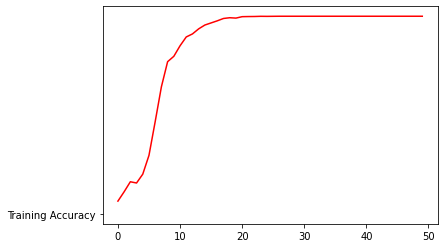

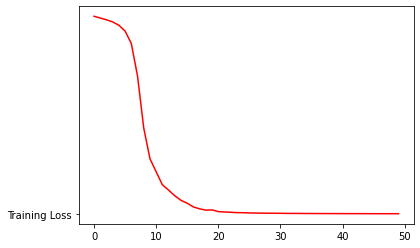

<Figure size 432x288 with 0 Axes>

In [ ]:
from tensorflow.python.util.tf_export import InvalidSymbolNameError
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
accuracy = history.history['acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
val_acc=history.history['val_acc']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'r',"Training Accuracy")
#plt.plot(epochs,val_acc,'b',"Validation Accuracy")
plt.figure()
plt.plot(epochs,loss,'r',"Training Loss")
#plt.plot(epochs,val_loss,'b',"Validatin Loss")
plt.figure()


Saving test (1).png to test (1) (3).png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Dự đoán:  SUNSILK


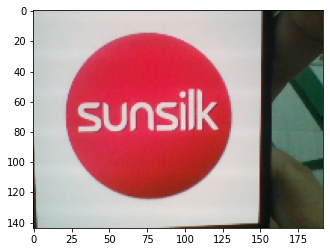

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(128,128))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', lable[np.argmax(y_predict)])
  

Saving tải xuống (1).jpg to tải xuống (1) (7).jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Dự đoán:  MILO


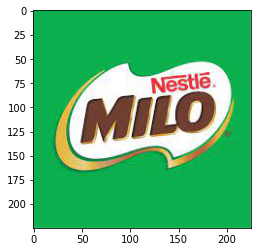

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(128,128))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', lable[np.argmax(y_predict)])
  

In [ ]:
score = model.evaluate(train_generator,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.0027046885807067156
Độ chính xác  1.0


In [ ]:
model.save('/content/drive/MyDrive/AI/model1.h5')